# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

Daniel Escudero

#### RA

11005716

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha um para este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [2]:
from sklearn import datasets, decomposition, model_selection, metrics, linear_model
from matplotlib import pyplot as plt
import statistics

In [3]:
(x,y) = datasets.load_boston(return_X_y=True) # Ref [1]
print(x.shape, y.shape)

(506, 13) (506,)


In [10]:
# Redução de dimensões (com PCA)
fastICA = decomposition.FastICA(n_components=1) # Ref [2]
x_fastICA = fastICA.fit_transform(x)

print(x_pca.shape, y.shape)

(506, 1) (506,)


In [11]:
def getModel(modelType):
    return modelType()

def getScores(y_test, y_pred):
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    return (mse, r2)

def printStatistics(values):
    print('Mínimo        %.2f' %min(values))
    print('Mediana       %.2f' %statistics.median(values))
    print('Máximo        %.2f' %max(values))
    print('Média         %.2f' %statistics.mean(values))
    print('Desvio Padrão %.2f' %statistics.stdev(values))
    
def testModel(modelType, modelName, keepSamePlot=False, color='blue'):
    MSEs = []
    R2s = []
    totalIterations = 1000;
    
    for i in range(totalIterations):
        model = getModel(modelType)
        
        # Split data
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x_pca, y, test_size=0.2)
        
        # Train and predict
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
        # Save scores
        (mse, r2) = getScores(y_test, y_pred)
        MSEs.append(mse)
        R2s.append(r2)
    
    if (keepSamePlot):        
        plt.scatter(x_test, y_test, color='red', s=5)
        plt.plot(x_test, y_pred, color=color, label=modelName)
    else:
        print('')
        print('')
        print('=====', modelName, '=====')
        
        plt.scatter(x_test, y_test, color='red', s=5)
        plt.plot(x_test, y_pred, color=color)
        plt.title(modelName)
        plt.show()
    
        print('MSE:')
        printStatistics(MSEs)
        print('=====')
        print('R2:')
        printStatistics(R2s)



===== Linear Regression =====


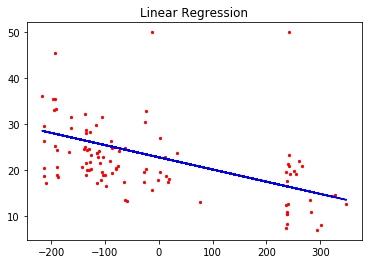

MSE:
Mínimo        29.89
Mediana       64.05
Máximo        117.41
Média         64.61
Desvio Padrão 13.87
=====
R2:
Mínimo        -0.06
Mediana       0.23
Máximo        0.42
Média         0.23
Desvio Padrão 0.08


===== Ridge =====


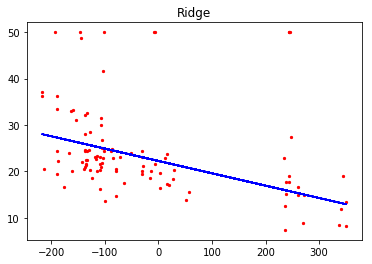

MSE:
Mínimo        27.66
Mediana       64.65
Máximo        108.59
Média         65.05
Desvio Padrão 13.38
=====
R2:
Mínimo        -0.06
Mediana       0.24
Máximo        0.44
Média         0.23
Desvio Padrão 0.08


===== Lasso =====


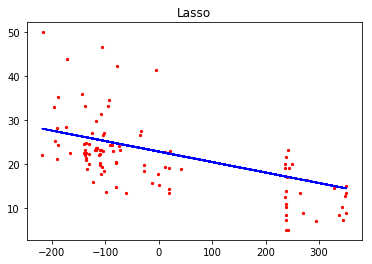

MSE:
Mínimo        25.86
Mediana       64.01
Máximo        108.88
Média         64.59
Desvio Padrão 13.44
=====
R2:
Mínimo        -0.12
Mediana       0.23
Máximo        0.45
Média         0.23
Desvio Padrão 0.08


In [12]:
testModel(linear_model.LinearRegression, 'Linear Regression') # Ref [3]
testModel(linear_model.Ridge, 'Ridge')
testModel(linear_model.Lasso, 'Lasso')

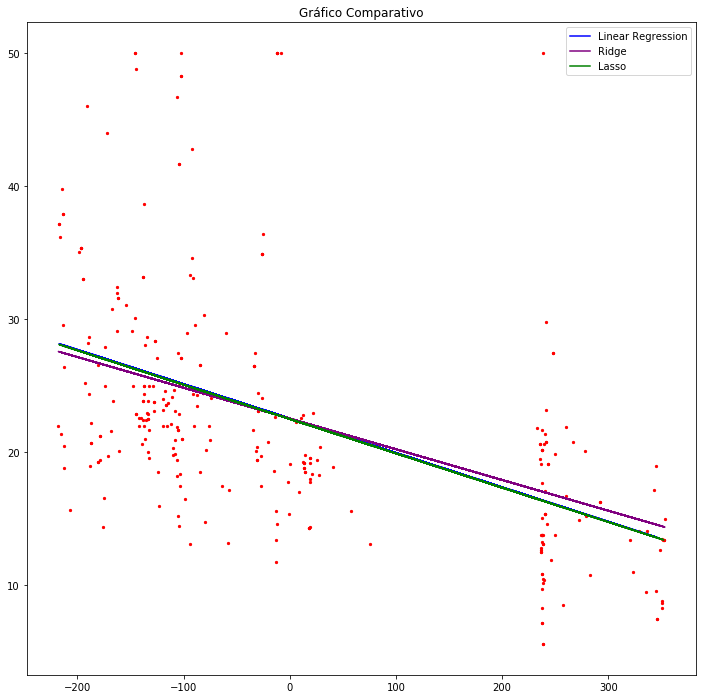

In [13]:
plt.figure(figsize=(12,12)) # Ref [4]

testModel(linear_model.LinearRegression, 'Linear Regression', True, 'blue')
testModel(linear_model.Ridge, 'Ridge', True, 'purple')
testModel(linear_model.Lasso, 'Lasso', True, 'green')

plt.title('Gráfico Comparativo')
plt.legend()
plt.show()

### Referências
- [1] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
- [2] https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
- [3] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
- [4] https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib